In [1]:
import math


def merge(a, first_index, middle_index, last_index):
    n1 = middle_index - first_index + 1
    n2 = last_index - middle_index

    left = [0] * n1
    right = [0] * n2

    for i in range(n1):
        left[i] = a[first_index + i - 1]

    for j in range(n2):
        right[j] = a[middle_index + j]

    left.append(float('inf'))
    right.append(float('inf'))

    i = 0
    j = 0

    for k in range(first_index - 1, last_index):
        if left[i] <= right[j]:
            a[k] = left[i]
            i += 1
        else:
            a[k] = right[j]
            j += 1

    return a


def merge_sort(a, first_index=0, last_index=None):
    """Sorts a list using the 'merge-sort' algorithm."""
    if last_index is None:
        last_index = len(a) - 1
    if first_index < last_index:
        middle_index = (first_index + last_index) // 2
        merge_sort(a, first_index, middle_index)
        merge_sort(a, middle_index + 1, last_index)
        return merge(a, first_index, middle_index, last_index)


def parent(i):
    return math.floor((i-1) / 2)


def left_child(i):
    return 2 * i + 1


def right_child(i):
    return 2 * i + 2


def max_heapify(a, i, heap_size):
    """Max-heapifies subtree of 'a' rooted at 'i'."""
    l = left_child(i)
    r = right_child(i)
    if l <= heap_size - 1 and a[l] > a[i]:
        largest = l
    else:
        largest = i
    if r <= heap_size - 1 and a[r] > a[largest]:
        largest = r
    if largest != i:
        a[i], a[largest] = a[largest], a[i]
        max_heapify(a, largest, heap_size)


def build_max_heap(a):
    """Builds a max heap"""
    heap_size = len(a)
    for i in range(math.floor(heap_size / 2), -1, -1):
        max_heapify(a, i, heap_size)


def heap_sort(a):
    """Sorts a list using the 'heap-sort' algorithm."""

    build_max_heap(a)
    heap_size = len(a)
    for i in range(len(a) - 1, 0, -1):
        a[0], a[i] = a[i], a[0]
        heap_size -= 1
        max_heapify(a, 0, heap_size)


def partition(array, low, high):
    """DEFINE PARTITION FOR QUICKSORT"""
    i = (low - 1)
    pivot = array[high]
    for j in range(low, high):
        if array[j] <= pivot:
            i = i + 1
            array[i], array[j] = array[j], array[i]
    array[i + 1], array[high] = array[high], array[i + 1]
    return i + 1


def quick_sort(array, low=0, high=None):
    """Sorts a list using the quicksort algorithm."""
    if high is None:
        high = len(array) - 1
    if low < high:
        part = partition(array, low, high)
        quick_sort(array, low, part - 1)
        quick_sort(array, part + 1, high)


In [6]:
import numpy as np
import timeit
import copy
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(12235)
results = pd.DataFrame(columns=['Input ordering', 'Input size', 'Run number', 'Sorting algorithm', 'Time'])
sorting_functions = {'Merge sort': merge_sort, 'Heapsort': heap_sort, 'Quicksort': quick_sort, 'Built-in Python': sorted, 'Numpy': np.sort}

for input_ordering in ['sorted', 'reverse', 'random']:
    for input_size in range(1, 8):
        test_data = np.random.random((10**input_size, ))
        if input_ordering == 'sorted':
          test_data = sorted(test_data)
        elif input_ordering == 'reverse':
          test_data = list(reversed(sorted(test_data)))
        
        for sorting_name, sorting_function in sorting_functions.items():
            quicksort_recursion_error = sorting_name == 'Quicksort' and ((input_ordering == 'sorted' or input_ordering == 'reverse') and input_size > 2)
            
            if not quicksort_recursion_error:
                clock = timeit.Timer(stmt='sort_func(copy(data))', globals={'sort_func': sorting_function, 'data': test_data, 'copy': copy.copy})

                n_ar, t_ar = clock.autorange()
                t = clock.repeat(repeat=7, number=n_ar)
                print(f"{sorting_name} minimum time on {input_ordering} data of size 10^{input_size}:", min(t))
        
                for run_number in range(7):
                    results = results.append({'Input ordering': input_ordering, 'Input size': 10**input_size, 'Run number': run_number + 1, 'Sorting algorithm': sorting_name, 'Time': t[run_number]}, ignore_index=True)
        print("--------------------")

print(results)
results.to_csv('results.csv')


Merge sort minimum time on sorted data of size 10^1: 0.41196539999964443
Heapsort minimum time on sorted data of size 10^1: 0.1786021999996592
Quicksort minimum time on sorted data of size 10^1: 0.23550710000017716
Built-in Python minimum time on sorted data of size 10^1: 0.18591490000017075
Numpy minimum time on sorted data of size 10^1: 0.15099110000028304
--------------------
Merge sort minimum time on sorted data of size 10^2: 0.2682758000000831
Heapsort minimum time on sorted data of size 10^2: 0.3269566999997551
Quicksort minimum time on sorted data of size 10^2: 0.3106724999997823
Built-in Python minimum time on sorted data of size 10^2: 0.21345250000013039
Numpy minimum time on sorted data of size 10^2: 0.19670200000018667
--------------------
Merge sort minimum time on sorted data of size 10^3: 0.36704480000025796
Heapsort minimum time on sorted data of size 10^3: 0.20380199999999604
Built-in Python minimum time on sorted data of size 10^3: 0.1892801000003601
Numpy minimum tim

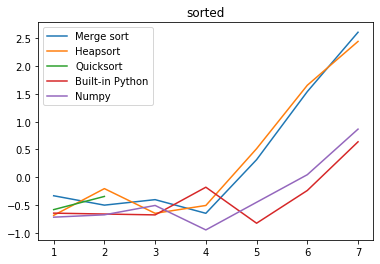

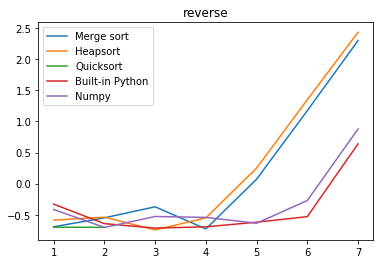

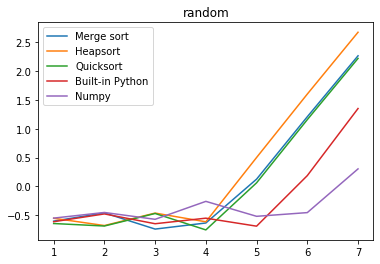

In [8]:
import matplotlib.pyplot as plt
import numpy as np

for input_ord in ['sorted', 'reverse', 'random']:
    plt.figure()
    plt.title(input_ord)
    
    is_input_ord = results['Input ordering'] == input_ord
    results_input_ord = results[is_input_ord]

    for sorting_algorithm in ['Merge sort', 'Heapsort', 'Quicksort', 'Built-in Python', 'Numpy']:
        
        is_sorting_algorithm = results_input_ord['Sorting algorithm'] == sorting_algorithm
        results_sorting_algorithm = results_input_ord[is_sorting_algorithm]
        sorting_algorithm_means = []
        for input_size in [1, 2, 3, 4, 5, 6, 7]:
            is_input_size = results_sorting_algorithm['Input size'] == 10**input_size
            results_input_size = results_sorting_algorithm[is_input_size]
            sorting_algorithm_means.append(np.mean(results_input_size['Time']))
        plt.plot([1, 2, 3, 4, 5, 6, 7], np.log10(sorting_algorithm_means))

    plt.legend(['Merge sort', 'Heapsort', 'Quicksort', 'Built-in Python', 'Numpy'])
    plt.savefig(input_ord + '.png')

